#**Problem Definition**

Our company's expansion and diversification plans include venturing into the aviation industry to own and operate airplanes for commercial and private enterprises. A key preliminary step for this consideration is risk assesment for different aircrafts to advise which aircrafts pose the lowest risk for the intended business endeavor. This projects seeks to assess risk potential from analysis of aviation accident data from 1962 to 2023.

The primary objective of this exercise is to identify the lowest-risk aircraft for our company to purchase and operate. The following are some of the key considerations we expect to make:


*   Historical accident trends by aircraft type
*   Severity and frequency of accidents
*   Factors contributing to the accidents e.g. weather, pilot error or mechanical failures
*   Any correlations between operational risk and aircraft characteristics





#**Data Preprocessing**
This section prepare the provided aviation data for analysis. We intend to do the following:



*   Dataset Overview - Load and understand the data
*   Handling Missing Values using derived domain knowledge and imputation
*   Data Cleaning e.g. standardizing categorical values, deriving useful date data, removing duplicates etc

##**Dataset Overview**
It is imperative for us to understand the aviation dataset first i.e.:


*   The data structure e.g. available columns, data types and presence of missing values
*   Identify useful columns to focus on

Data Understanding will prescribe subsequent steps. Simple cleaning procedures e.g. capitalization will be done on the spot (immediately a need is observed) to ensure they are not forgotten. Complex cleaning procedures will be done in the **Data Cleaning** subsection

###Initializing Relevant Libraries

First, we initialize common libraries we project to utilize in this exercise

In [98]:
#Import libraries i'm likely to use upfront
import pandas as pd #To create and manipulate pandas dataframes
import seaborn as sns #To Facilitate visualizations
import matplotlib.pyplot as plt #To facilitate visualizations
import numpy as np #To facilitate mathematical calculations
from sklearn.preprocessing import LabelEncoder #Use this to encode categorical data
%matplotlib inline

###Loading the dataset

Then we load the provided dataset

In [99]:
#Load the aviation data
#Understand the data and get a snapshot of the data
aviation_df = pd.read_csv('Aviation_Data.csv')
aviation_df.info()

<ipython-input-99-2bbd9ca9aaa1>:3: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  aviation_df = pd.read_csv('Aviation_Data.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

###Data Understanding

Sampling a few columns to assess the various categorical data present will help us define how to clean the data, e.g.:


*   Investigation.Type
*   Injury.Severity
*   Aircraft.damage
*   Aircraft.Category
*   Make
*   Model
*   Amateur.Built
*   Engine.Type

In [100]:
aviation_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


####Investigation.Type

In [101]:
#Understand 'Investigation Type' column
aviation_df['Investigation.Type'].value_counts(normalize = True) * 100

,proportion
Investigation.Type,
Accident,94.097268
Incident,4.287865
25-09-2020,0.776996
26-09-2020,0.066410
02-02-2021,0.043166
...,...
13-09-2021,0.001107
04-08-2021,0.001107
05-08-2022,0.001107


There are 71 different categories, but the only seemingly relevant categories here are 'Accident' and 'Incident'. The others seem like noise. Perusal of the 'noisy" data on excel showed that where the column "Event.Id" was blank, there was a noisy column in 'Investigation.Type'. Dropping rows with empty Event.ID may fix this

####Injury Severity

In [102]:
#Understand 'injury.Severity' column
aviation_df['Injury.Severity'].value_counts(normalize = True) * 100

,proportion
Injury.Severity,
Non-Fatal,76.638715
Fatal(1),7.016805
Fatal,5.987097
Fatal(2),4.222371
Incident,2.524776
...,...
Fatal(270),0.001138
Fatal(60),0.001138
Fatal(43),0.001138


Where there are fatalities, the number of fatalies is appended on the string. This is unnecessary, since there's another column that details the number of fatalities. There is a need to clean this column.

####Aircraft Damage

In [103]:
#Understand 'Aircraft.damage' column
aviation_df['Aircraft.damage'].value_counts(normalize = True) * 100

,proportion
Aircraft.damage,
Substantial,74.856176
Destroyed,21.731723
Minor,3.273236
Unknown,0.138865


The categorization of extent of damage seems okay as is. There is no need for cleaning this column.

####Aircraft Category

In [104]:
#Understand 'Aircraft.Category' column
aviation_df['Aircraft.Category'].value_counts(normalize = True) * 100

,proportion
Aircraft.Category,
Airplane,85.535974
Helicopter,10.654443
Glider,1.573389
Balloon,0.715458
Gyrocraft,0.535819
Weight-Shift,0.498653
Powered Parachute,0.281847
Ultralight,0.092917
Unknown,0.043361


The categorization of Aircrafts seems okay as is. But there is a need to combine 'Unknown' and 'UNK' such that they are the same category

In [105]:
#Clean
#Use "Title" format to rewrite the 'Make' column
aviation_df['Model'] = aviation_df['Model'].str.title()
aviation_df['Model'].value_counts(normalize = True) * 100

,proportion
Model,
152,2.665631
172,1.977544
172N,1.310855
Pa-28-140,1.049585
150,0.933590
...,...
E75Nl,0.001126
747-273C,0.001126
Watcha-Mccall-It,0.001126


The number of models has been reduced from 12318 to 11646 following capitalization standardization. We now have a cleaner column.

In [106]:
aviation_df['Engine.Type'] = aviation_df['Engine.Type'].replace('UNK', 'Unknown')
#Check if implemented
aviation_df['Engine.Type'].value_counts(normalize = True) * 100

,proportion
Engine.Type,
Reciprocating,85.007274
Turbo Shaft,4.412358
Turbo Prop,4.145832
Turbo Fan,3.033267
Unknown,2.508772
Turbo Jet,0.859487
Geared Turbofan,0.014671
Electric,0.012226
LR,0.002445


In [107]:
#Standardize capitalization
aviation_df['Weather.Condition'] = aviation_df['Weather.Condition'].str.upper()
aviation_df['Weather.Condition'].value_counts(normalize = True) * 100

,proportion
Weather.Condition,
VMC,91.594488
IMC,7.080820
UNK,1.324692


####Make

In [108]:
#Understand 'Make' column
aviation_df['Make'].value_counts(normalize = True) * 100

,proportion
Make,
Cessna,25.023079
Piper,13.542206
CESSNA,5.541170
Beech,4.874699
PIPER,3.198388
...,...
Leonard Walters,0.001126
Maule Air Inc.,0.001126
Motley Vans,0.001126


Unstandardized capitalization is causing the same manufacturer to be split e.g. Cessna vs CESSNA. There is a need to regularize capitalization to prevent such an error.

####Model

In [109]:
#Understand "Model' column
aviation_df['Model'].value_counts(normalize = True) * 100

,proportion
Model,
152,2.665631
172,1.977544
172N,1.310855
Pa-28-140,1.049585
150,0.933590
...,...
E75Nl,0.001126
747-273C,0.001126
Watcha-Mccall-It,0.001126


Check and see whether lack of standard capitalization is introducing noise to this 'Model' column

####Amateur.Built

In [110]:
#Understand 'Amateur.Built' column
aviation_df['Amateur.Built'].value_counts(normalize = True) * 100

,proportion
Amateur.Built,
No,90.454684
Yes,9.545316


A few of the aircrafts were built by Amateurs i.e. 9.54%

####Engine.Type

In [111]:
#Understand 'Engine Type' column
aviation_df['Engine.Type'].value_counts(normalize = True) * 100

,proportion
Engine.Type,
Reciprocating,85.007274
Turbo Shaft,4.412358
Turbo Prop,4.145832
Turbo Fan,3.033267
Unknown,2.508772
Turbo Jet,0.859487
Geared Turbofan,0.014671
Electric,0.012226
LR,0.002445


The column seems clean, with Reciprocating Engine Aircrafts accounting for majority of the accidents/incidents. Entries with "UNK" should be substituted with "Unknown" to clean the data

####Purpose.of.flight

In [112]:
#Understand 'Purpose.of.flight' column
aviation_df['Purpose.of.flight'].value_counts(normalize = True) * 100

,proportion
Purpose.of.flight,
Personal,59.794188
Instructional,12.819087
Unknown,8.225208
Aerial Application,5.697909
Business,4.858701
Positioning,1.990399
Other Work Use,1.528471
Ferry,0.981898
Aerial Observation,0.960132


The column seems clean, with personal flights accounting for majority of the accidents/incidents

####Weather.Condition

In [113]:
 #Understand 'Weather.Condition' column
aviation_df['Weather.Condition'].value_counts(normalize = True) * 100


,proportion
Weather.Condition,
VMC,91.594488
IMC,7.080820
UNK,1.324692


IMC, or Instrument Meteorological Conditions, are weather conditions that require a pilot to rely on flight instruments. On the other hand, VMC, or Visual Meteorological Conditions, are weather conditions that allow a pilot to navigate by visual reference to the ground and other landmarks. 91.6% of the accidents occured during VMC i.e. weather is hardly a factor leading to accidents. We need to combine 'UNK' with 'Unk' i.e. standardize capitalization

####Broad.phase.of.flight

In [114]:
 #Understand 'Broad.phase.of.flight' column
aviation_df['Broad.phase.of.flight'].value_counts(normalize = True) * 100

,proportion
Broad.phase.of.flight,
Landing,24.995140
Takeoff,20.240101
Cruise,16.636965
Maneuvering,13.194219
Approach,10.605275
Climb,3.295315
Taxi,3.172186
Descent,3.057158
Go-around,2.192016


Majority of the accidents occur during landing e.g. 24.995%.

####Schedule

In [115]:
#Understand 'Schedule' column
aviation_df['Schedule'].value_counts(normalize = True) * 100

,proportion
Schedule,
NSCH,35.558735
UNK,32.578286
SCHD,31.862979


There seems to be a rather even distribution between scheduled and non-scheduled flights where accidents/incidents occurred, although more accidents occur for non-scheduled flights (35% vs 31%). We will need to replace "UNK" with "Unknown" to maintain similar format.

###Summary Of the Dataset Overview

The dataset contains 31 columns and 90348 rows (including the header columns). There are several missing values in different columns. The only column without any missing data is the 'Investigation.Type' column, and this can form a good place to start with the data cleaning exercise.

Further perusal of the data in Microsoft Excel gave some preliminary insights that can advise the data cleaning exercise:


*   Where 'Event.Id' is blank, all the other columns are also blank. These could be deleted from the onset
*   'Event.Date' uses a YYYY-MM-DD format whereas 'Publication.Date' uses a DD-MM-YYYY format. It would be better to standardize the date formats
*   'Investigation.Type' seems to have 2 relevant values, i.e. "Accident" and "Incident". The rest of the values seem to be dates, and where it is a date, the rest of the columns are empty. Such rows can also be deleted from the onset.
*   In the column 'Injury.Severity', there are too many categories since the number of fatalities is appended beside the label 'Fatal'. This is repetitive since there is another independent column 'Total.Fatal.Injuries' that details the number of fatalities. It may be better to just define the category 'fatal' for this column.
*   In the column 'Make', capitalization differences have been noted e.g. 'CESSNA' vs 'Cessna'. This could make python consider these as two different makers. This needs to be standardized/corrected.


##Data Cleaning

As Identified during data perusal, we need to clean the data as recommended during the data understanding phase

####Remove Rows with Empty Event.ID Values

In [116]:
#Remove rows where Event.Id is blank since all other columns are also blank when that is the case
aviation_df.dropna(subset = ['Event.Id'], inplace = True)

In [117]:
#Get a new snapshot view of the data after removing empty Event.Id rows.
aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88889 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null  obj

In [118]:
aviation_df['Investigation.Type'].value_counts(normalize = True) * 100

,proportion
Investigation.Type,
Accident,95.641755
Incident,4.358245


After removing rows where 'Event.Id' was empty, the resultant data now only has 2 categories in the 'Investigation.Type' column i.e. 'Accident' and 'Incident'

####Remove Rows with Empty Make Values

In [119]:
#Remove rows where Make is blank since such data is not useful to this exercise
aviation_df.dropna(subset = ['Make'], inplace = True)

In [120]:
#Get a new snapshot view of the data after removing empty 'Make' columns
aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88826 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88826 non-null  object 
 1   Investigation.Type      88826 non-null  object 
 2   Accident.Number         88826 non-null  object 
 3   Event.Date              88826 non-null  object 
 4   Location                88774 non-null  object 
 5   Country                 88601 non-null  object 
 6   Latitude                34360 non-null  object 
 7   Longitude               34351 non-null  object 
 8   Airport.Code            50118 non-null  object 
 9   Airport.Name            52689 non-null  object 
 10  Injury.Severity         87843 non-null  object 
 11  Aircraft.damage         85650 non-null  object 
 12  Aircraft.Category       32275 non-null  object 
 13  Registration.Number     87483 non-null  object 
 14  Make                    88826 non-null  obj

####Clean Injury.Severity Categories

In [121]:
#Clean the 'Injury.Severity' column by removing the number of fatalies from the string
#This will make the data cleaner i.e. reduce the number of severity categories
#The code searches for any entries where the substring 'Fatal(' appears and replaces the whole entry with just 'Fatal'
#This way, 2 seperate categories e.g. Fatal(20) and Fatal(104) will all be made into the same category of 'Fatal'
aviation_df.loc[aviation_df['Injury.Severity'].str.contains("Fatal\\(", na=False), 'Injury.Severity'] = 'Fatal'

In [122]:
#Confirm that the cleaning exercise has yielded clean data (removed number of fatalities from the string)
aviation_df['Injury.Severity'].value_counts(normalize = True) * 100

,proportion
Injury.Severity,
Non-Fatal,76.650388
Fatal,20.273670
Incident,2.522683
Minor,0.248170
Serious,0.196942
Unavailable,0.108147


Injury Severity has now been cleaned to 6 clear categories. The number of fatalities will be evaluated using Total.Fatal.Injuries data

###Clean Make Data by Standardizing Capitalization

In [123]:
#Standardize the text capitalization to combine e.g. 'CESSNA' and 'Cessna'
#Use "title" capitalization format to rewrite the 'Make' column
aviation_df['Make'] = aviation_df['Make'].str.title()
aviation_df['Make'].value_counts(normalize = True) * 100 #Confirm if implementation has worked

,proportion
Make,
Cessna,30.564249
Piper,16.740594
Beech,6.047779
Boeing,3.090311
Bell,3.064418
...,...
Cohen,0.001126
Kitchens,0.001126
Lutes,0.001126


This has reduced the number of manufacturers from 8237 to 7587 i.e. we have cleaner "Make" data.

###Clean Make Data by Aggregating Makers e.g. Boeing Vertol and Boeing-Brown are all just Boeing

Some of the major makers affected by this are Airbus, Boeing and Cessna

In [124]:
aviation_df['Make'] = aviation_df['Make'].apply(lambda x: 'Cessna' if 'Cessna' in x else x)
aviation_df['Make'] = aviation_df['Make'].apply(lambda x: 'Boeing' if 'Boeing' in x else x)
aviation_df['Make'] = aviation_df['Make'].apply(lambda x: 'Airbus' if 'Airbus' in x else x)

###Clean Model Data by Standardizing Capitalization

In [125]:
#Standardize the text capitalization
#Use "title" capitalization format to rewrite the 'Model' column
aviation_df['Model'] = aviation_df['Model'].str.title()
aviation_df['Model'].value_counts(normalize = True) * 100 #Confirm if implementation has worked

,proportion
Model,
152,2.666231
172,1.977990
172N,1.311150
Pa-28-140,1.049821
150,0.933800
...,...
Challenger 2,0.001126
Bushby Mustang M-Ii,0.001126
Harvard Mk Ii,0.001126


Capitalization noise has been successfully removed

###Clean Aircraft.Category by combining 'UNK' and 'Unknown'
'UNK' appears to mean 'Unknown' in this data set. We need to combine them where both appear

In [126]:
aviation_df['Aircraft.Category'] = aviation_df['Aircraft.Category'].replace('UNK', 'Unknown') #Replace 'UNK' entries with 'Unknown'
aviation_df['Aircraft.Category'].value_counts(normalize = True) * 100

,proportion
Aircraft.Category,
Airplane,85.539892
Helicopter,10.649109
Glider,1.573974
Balloon,0.715724
Gyrocraft,0.536019
Weight-Shift,0.498838
Powered Parachute,0.281952
Ultralight,0.092951
Unknown,0.049574


'UNK' and 'Unknown' successully merged

###Clean Engine.Type by combining 'UNK' with 'Unknown'
'UNK' appears to mean 'Unknown' in this data set. We need to combine them where both appear

In [127]:
aviation_df['Engine.Type'] = aviation_df['Engine.Type'].replace('UNK', 'Unknown') #Replace 'UNK' entries with 'Unknown'
aviation_df['Engine.Type'].value_counts(normalize = True) * 100

,proportion
Engine.Type,
Reciprocating,85.006297
Turbo Shaft,4.413005
Turbo Prop,4.146440
Turbo Fan,3.033712
Unknown,2.507917
Turbo Jet,0.859613
Geared Turbofan,0.014673
Electric,0.012228
LR,0.002446


###Clean Weather.Condition by Standardizing Capitalization

In [128]:
#Standardize the text capitalization
#Use "upper" capitalization format to rewrite the 'Model' column
aviation_df['Weather.Condition'] = aviation_df['Weather.Condition'].str.upper()
aviation_df['Weather.Condition'] = aviation_df['Weather.Condition'].replace('UNK', 'Unknown') #Replace 'UNK' entries with 'Unknown'
aviation_df['Weather.Condition'].value_counts(normalize = True) * 100 #Confirm if implementation has worked

,proportion
Weather.Condition,
VMC,91.596738
IMC,7.079363
Unknown,1.323899


###Clean Schedule by Replacing UNK with Unknown

In [129]:
aviation_df['Schedule'] = aviation_df['Schedule'].replace('UNK', 'Unknown') #Replace 'UNK' entries with 'Unknown'
aviation_df['Schedule'].value_counts(normalize = True) * 100 #Confirm if implementation has worked

,proportion
Schedule,
NSCH,35.581599
Unknown,32.679582
SCHD,31.738818


###Check for Duplicates

In [130]:
aviation_df.duplicated().sum()

0

There are no duplicated rowa in the dataset.

###Convert Date Columns to standard datetime format

In [131]:

#Transform the date columns to standard datetime format
aviation_df['Event.Date'] = pd.to_datetime(aviation_df['Event.Date'], format = '%Y-%m-%d')
aviation_df['Publication.Date'] = pd.to_datetime(aviation_df['Publication.Date'], format = '%d-%m-%Y')

aviation_df['Event.Date'] = aviation_df['Event.Date'].dt.strftime('%d-%m-%Y')
aviation_df['Publication.Date'] = aviation_df['Publication.Date'].dt.strftime('%d-%m-%Y')

aviation_df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
90343,20221227106491,Accident,ERA23LA093,26-12-2022,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,26-12-2022,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,26-12-2022,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,26-12-2022,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90347,20221230106513,Accident,ERA23LA097,29-12-2022,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


The dates are now written in a standard format

In [132]:
aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88826 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88826 non-null  object 
 1   Investigation.Type      88826 non-null  object 
 2   Accident.Number         88826 non-null  object 
 3   Event.Date              88826 non-null  object 
 4   Location                88774 non-null  object 
 5   Country                 88601 non-null  object 
 6   Latitude                34360 non-null  object 
 7   Longitude               34351 non-null  object 
 8   Airport.Code            50118 non-null  object 
 9   Airport.Name            52689 non-null  object 
 10  Injury.Severity         87843 non-null  object 
 11  Aircraft.damage         85650 non-null  object 
 12  Aircraft.Category       32275 non-null  object 
 13  Registration.Number     87483 non-null  object 
 14  Make                    88826 non-null  obj

###Handling Missing Values
We will use different strategies to handle different categories of missing data



*   Most of the longitude and latitude data is missing, and it does not seem to be relevant to this study. Additionally, we also have location data which is more readily available. Thus, we can drop the longitude and latitude columns
*   FAR.Description data seems irrelelevant to the study
*   For the few missing values of relevant categorical columns, we can fill missing values with "Unknown". We may be able to extract insight even with "Unknown" parameters if others related parameters are known e.g. you may have an unknown model but know the manufacturer. This remains relevant to our study.
*   For the data on total number of injuries, it is best to assume that the data meant to be there is '0' e.g. if Total.Serious.Injuries is empty, we assume it was 0.






In [133]:
#These columns seem irrelevant at this time for the study. We will drop them for now
aviation_df.drop(['Longitude', 'Latitude','FAR.Description'], axis = 1, inplace = True)

In [134]:
#replace missing categorical data with "Unknown"
aviation_df['Location'] = aviation_df['Location'].fillna('Unknown')
aviation_df['Country'] = aviation_df['Country'].fillna('Unknown')
aviation_df['Injury.Severity'] = aviation_df['Injury.Severity'].fillna('Unknown')
aviation_df['Airport.Code'] = aviation_df['Airport.Code'].fillna('Unknown')
aviation_df['Airport.Name'] = aviation_df['Airport.Name'].fillna('Unknown')
aviation_df['Injury.Severity'] = aviation_df['Injury.Severity'].fillna('Unknown')
aviation_df['Aircraft.damage'] = aviation_df['Aircraft.damage'].fillna('Unknown')
aviation_df['Aircraft.Category'] = aviation_df['Aircraft.Category'].fillna('Unknown')
aviation_df['Registration.Number'] = aviation_df['Registration.Number'].fillna('Unknown')
aviation_df['Model'] = aviation_df['Model'].fillna('Unknown')
aviation_df['Amateur.Built'] = aviation_df['Amateur.Built'].fillna('Unknown')
aviation_df['Number.of.Engines'] = aviation_df['Number.of.Engines'].fillna('Unknown')
aviation_df['Air.carrier'] = aviation_df['Air.carrier'].fillna('Unknown')
aviation_df['Purpose.of.flight'] = aviation_df['Purpose.of.flight'].fillna('Unknown')
aviation_df['Schedule'] = aviation_df['Schedule'].fillna('Unknown')
aviation_df['Weather.Condition'] = aviation_df['Weather.Condition'].fillna('Unknown')
aviation_df['Broad.phase.of.flight'] = aviation_df['Broad.phase.of.flight'].fillna('Unknown')
aviation_df['Report.Status'] = aviation_df['Report.Status'].fillna('Unknown')
aviation_df['Engine.Type'] = aviation_df['Engine.Type'].fillna('Unknown')
#aviation_df[''] = aviation_df[''].fillna('Unknown')
aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88826 entries, 0 to 90347
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88826 non-null  object 
 1   Investigation.Type      88826 non-null  object 
 2   Accident.Number         88826 non-null  object 
 3   Event.Date              88826 non-null  object 
 4   Location                88826 non-null  object 
 5   Country                 88826 non-null  object 
 6   Airport.Code            88826 non-null  object 
 7   Airport.Name            88826 non-null  object 
 8   Injury.Severity         88826 non-null  object 
 9   Aircraft.damage         88826 non-null  object 
 10  Aircraft.Category       88826 non-null  object 
 11  Registration.Number     88826 non-null  object 
 12  Make                    88826 non-null  object 
 13  Model                   88826 non-null  object 
 14  Amateur.Built           88826 non-null  obj

In [135]:
#Replace missing quantitative data with 0
aviation_df['Total.Fatal.Injuries'] = aviation_df['Total.Fatal.Injuries'].fillna(0)
aviation_df['Total.Serious.Injuries'] = aviation_df['Total.Serious.Injuries'].fillna(0)
aviation_df['Total.Minor.Injuries'] = aviation_df['Total.Minor.Injuries'].fillna(0)
aviation_df['Total.Uninjured'] = aviation_df['Total.Uninjured'].fillna(0)

aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88826 entries, 0 to 90347
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88826 non-null  object 
 1   Investigation.Type      88826 non-null  object 
 2   Accident.Number         88826 non-null  object 
 3   Event.Date              88826 non-null  object 
 4   Location                88826 non-null  object 
 5   Country                 88826 non-null  object 
 6   Airport.Code            88826 non-null  object 
 7   Airport.Name            88826 non-null  object 
 8   Injury.Severity         88826 non-null  object 
 9   Aircraft.damage         88826 non-null  object 
 10  Aircraft.Category       88826 non-null  object 
 11  Registration.Number     88826 non-null  object 
 12  Make                    88826 non-null  object 
 13  Model                   88826 non-null  object 
 14  Amateur.Built           88826 non-null  obj

##Encoding Categorical Data to Facilitate Correlation Calculations

To enable us calculate correlations between various categorical attributes, it becomes important to codify the categorical data. We would need to create a new dataframe for storing the encoded data

In [136]:
encoded_aviation_df = aviation_df.copy()
#encoded_aviation_df.drop(['Accident.Number', 'Publication.Date','Registration.Number','Event.Date'], axis = 1, inplace = True)
encoded_aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88826 entries, 0 to 90347
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88826 non-null  object 
 1   Investigation.Type      88826 non-null  object 
 2   Accident.Number         88826 non-null  object 
 3   Event.Date              88826 non-null  object 
 4   Location                88826 non-null  object 
 5   Country                 88826 non-null  object 
 6   Airport.Code            88826 non-null  object 
 7   Airport.Name            88826 non-null  object 
 8   Injury.Severity         88826 non-null  object 
 9   Aircraft.damage         88826 non-null  object 
 10  Aircraft.Category       88826 non-null  object 
 11  Registration.Number     88826 non-null  object 
 12  Make                    88826 non-null  object 
 13  Model                   88826 non-null  object 
 14  Amateur.Built           88826 non-null  obj

In [137]:
encoded_aviation_df['Investigation.Type.encoded'] = pd.Categorical(encoded_aviation_df['Investigation.Type']).codes
encoded_aviation_df['Location.encoded'] = pd.Categorical(encoded_aviation_df['Location']).codes
encoded_aviation_df['Country.encoded'] = pd.Categorical(encoded_aviation_df['Country']).codes
encoded_aviation_df['Airport.Code.encoded'] = pd.Categorical(encoded_aviation_df['Airport.Code']).codes
encoded_aviation_df['Airport.Name.encoded'] = pd.Categorical(encoded_aviation_df['Airport.Name']).codes
encoded_aviation_df['Injury.Severity.encoded'] = pd.Categorical(encoded_aviation_df['Injury.Severity']).codes
encoded_aviation_df['Aircraft.damage.encoded'] = pd.Categorical(encoded_aviation_df['Aircraft.damage']).codes
encoded_aviation_df['Aircraft.Category.encoded'] = pd.Categorical(encoded_aviation_df['Aircraft.Category']).codes
encoded_aviation_df['Make.encoded'] = pd.Categorical(encoded_aviation_df['Make']).codes
encoded_aviation_df['Model.encoded'] = pd.Categorical(encoded_aviation_df['Model']).codes
encoded_aviation_df['Amateur.Built.encoded'] = pd.Categorical(encoded_aviation_df['Amateur.Built']).codes
#encoded_aviation_df['Number.of.Engines.encoded'] = pd.Categorical(encoded_aviation_df['Number.of.Engines']).codes
encoded_aviation_df['Engine.Type.encoded'] = pd.Categorical(encoded_aviation_df['Engine.Type']).codes
encoded_aviation_df['Schedule.encoded'] = pd.Categorical(encoded_aviation_df['Schedule']).codes
encoded_aviation_df['Purpose.of.flight.encoded'] = pd.Categorical(encoded_aviation_df['Purpose.of.flight']).codes
encoded_aviation_df['Weather.Condition.encoded'] = pd.Categorical(encoded_aviation_df['Weather.Condition']).codes
encoded_aviation_df['Broad.phase.of.flight.encoded'] = pd.Categorical(encoded_aviation_df['Broad.phase.of.flight']).codes
#encoded_aviation_df['.encoded'] = pd.Categorical(encoded_aviation_df['']).codes

encoded_aviation_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 88826 entries, 0 to 90347
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Event.Id                       88826 non-null  object 
 1   Investigation.Type             88826 non-null  object 
 2   Accident.Number                88826 non-null  object 
 3   Event.Date                     88826 non-null  object 
 4   Location                       88826 non-null  object 
 5   Country                        88826 non-null  object 
 6   Airport.Code                   88826 non-null  object 
 7   Airport.Name                   88826 non-null  object 
 8   Injury.Severity                88826 non-null  object 
 9   Aircraft.damage                88826 non-null  object 
 10  Aircraft.Category              88826 non-null  object 
 11  Registration.Number            88826 non-null  object 
 12  Make                           88826 non-null  obje

In [138]:
#Output data to CSV for EDA with Tableau
encoded_aviation_df.to_csv('encoded_aviation_data.csv', index = False)

In [139]:
encoded_aviation_df['Total.Fatal.Injuries'] = encoded_aviation_df['Total.Fatal.Injuries'].astype(int)
encoded_aviation_df['Total.Serious.Injuries'] = encoded_aviation_df['Total.Serious.Injuries'].astype(int)
encoded_aviation_df['Total.Minor.Injuries'] = encoded_aviation_df['Total.Minor.Injuries'].astype(int)
encoded_aviation_df['Total.Uninjured'] = encoded_aviation_df['Total.Uninjured'].astype(int)

In [140]:
encoded_aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88826 entries, 0 to 90347
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Event.Id                       88826 non-null  object
 1   Investigation.Type             88826 non-null  object
 2   Accident.Number                88826 non-null  object
 3   Event.Date                     88826 non-null  object
 4   Location                       88826 non-null  object
 5   Country                        88826 non-null  object
 6   Airport.Code                   88826 non-null  object
 7   Airport.Name                   88826 non-null  object
 8   Injury.Severity                88826 non-null  object
 9   Aircraft.damage                88826 non-null  object
 10  Aircraft.Category              88826 non-null  object
 11  Registration.Number            88826 non-null  object
 12  Make                           88826 non-null  object
 13  Model 

In [141]:
#Prepare a purely numerical datafram to facilitate correlation analysis
correlation_aviation_df = encoded_aviation_df.copy() #Make a copy of the dataset
correlation_aviation_df = correlation_aviation_df.iloc[:, 20:] #Drop the non-numerical data sets
correlation_aviation_df.drop(['Weather.Condition','Broad.phase.of.flight','Report.Status','Publication.Date'], axis = 1, inplace = True)
correlation_aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88826 entries, 0 to 90347
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Total.Fatal.Injuries           88826 non-null  int64
 1   Total.Serious.Injuries         88826 non-null  int64
 2   Total.Minor.Injuries           88826 non-null  int64
 3   Total.Uninjured                88826 non-null  int64
 4   Investigation.Type.encoded     88826 non-null  int8 
 5   Location.encoded               88826 non-null  int16
 6   Country.encoded                88826 non-null  int16
 7   Airport.Code.encoded           88826 non-null  int16
 8   Airport.Name.encoded           88826 non-null  int16
 9   Injury.Severity.encoded        88826 non-null  int8 
 10  Aircraft.damage.encoded        88826 non-null  int8 
 11  Aircraft.Category.encoded      88826 non-null  int8 
 12  Make.encoded                   88826 non-null  int16
 13  Model.encoded        

#**Exploratory Data Analysis with Python & Tableau**

We can check for correlation in the measures in our data:

Text(0.5, 1.0, 'Correlation Heat Map for the Aviation Data Measures')

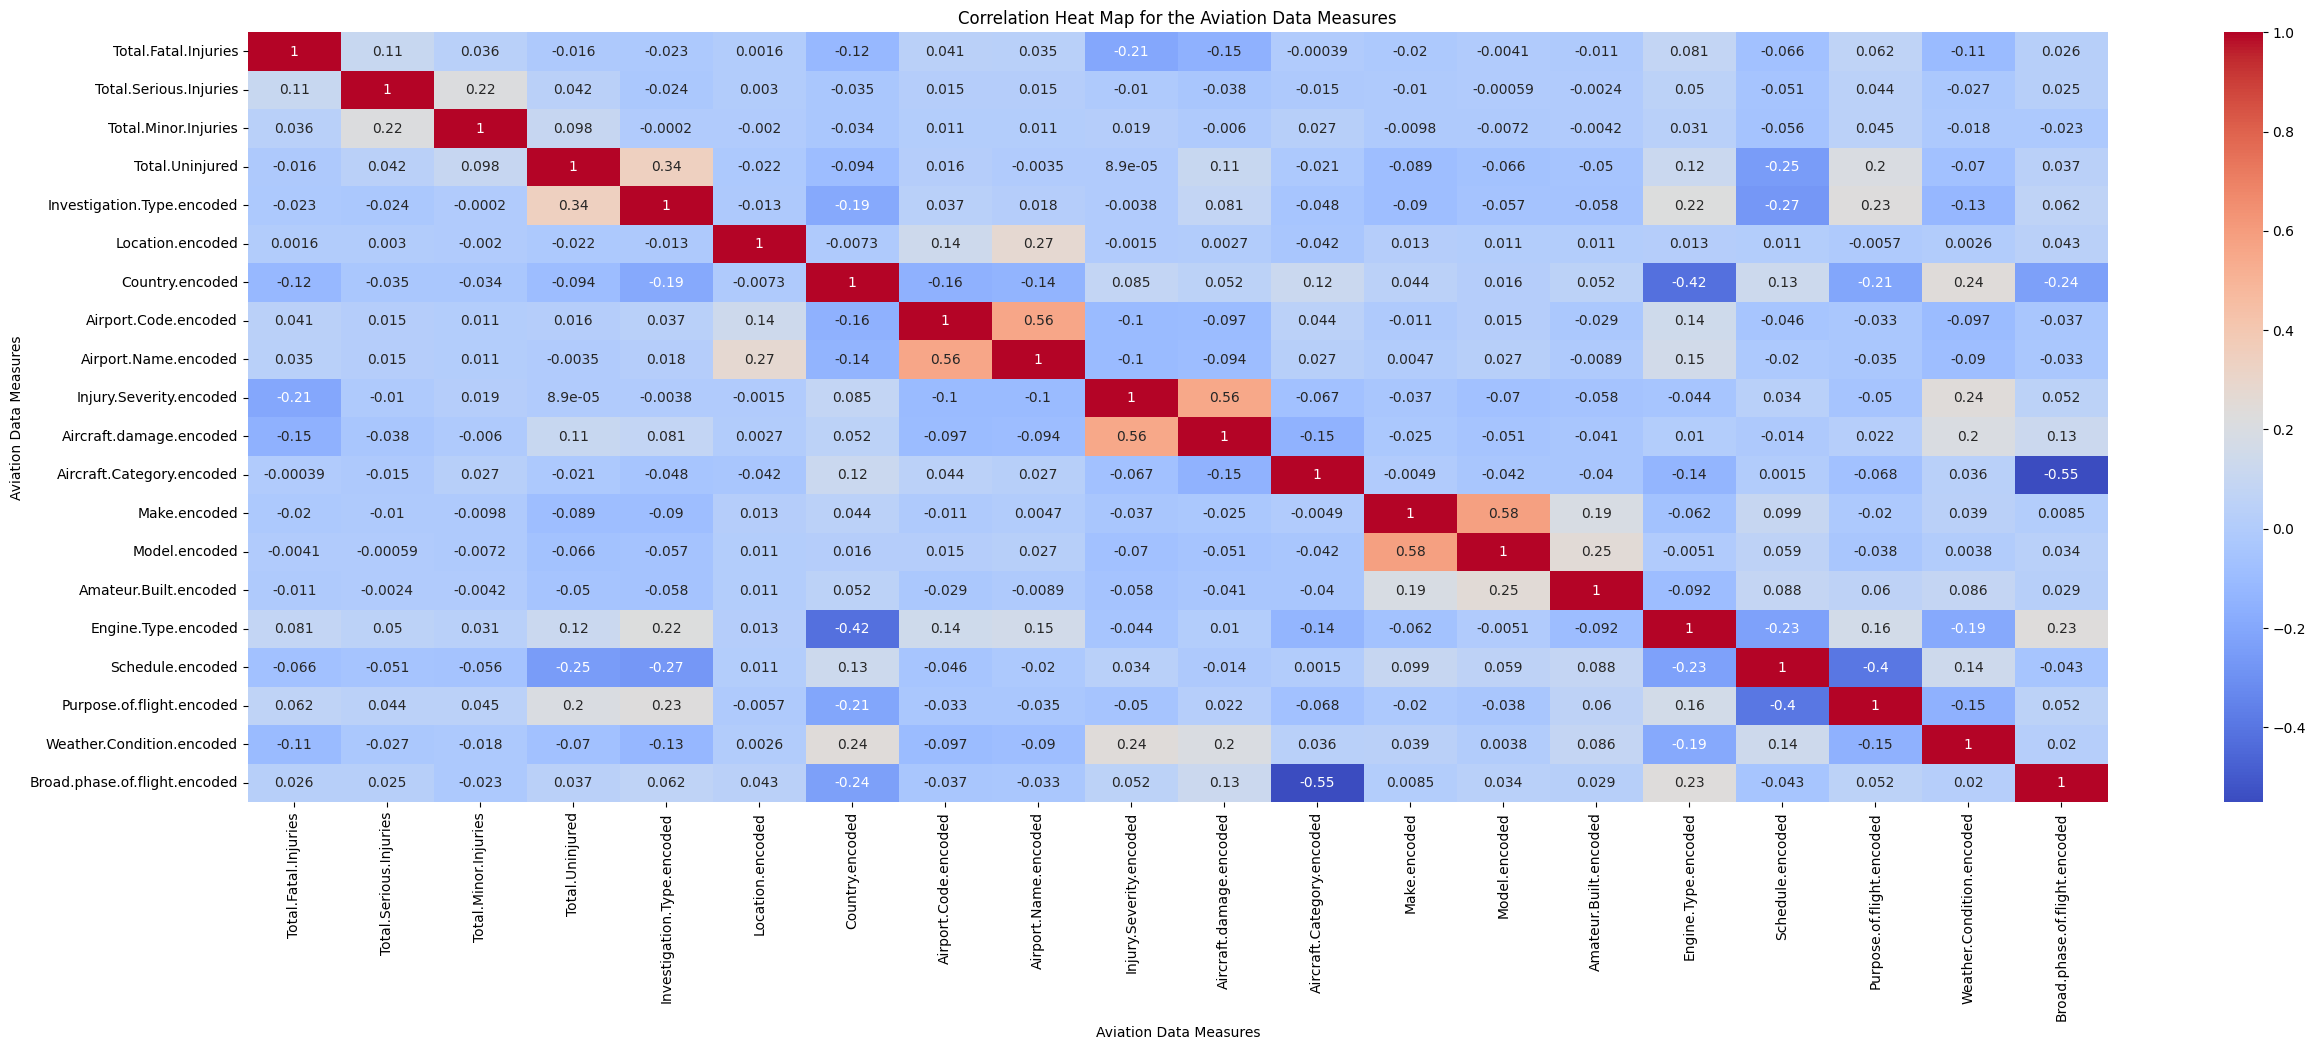

In [142]:
#Use a heatmap to compare correlation between various measures (including the numerically encoded categories)
plt.figure(figsize = (30,10))
sns.heatmap(correlation_aviation_df.corr(), annot = True, cmap = 'coolwarm')
plt.xlabel('Aviation Data Measures')
plt.ylabel("Aviation Data Measures")
plt.title("Correlation Heat Map for the Aviation Data Measures")


There is no immediate correlationary insight noted from correlation heat map. This could be due to the several cases of "Unknown" category. It is prudent to carry out further exploratory analysis using Tableau.

# Tableau EDA

Most of the accidents occur in the USA, distributed across almost all the states.

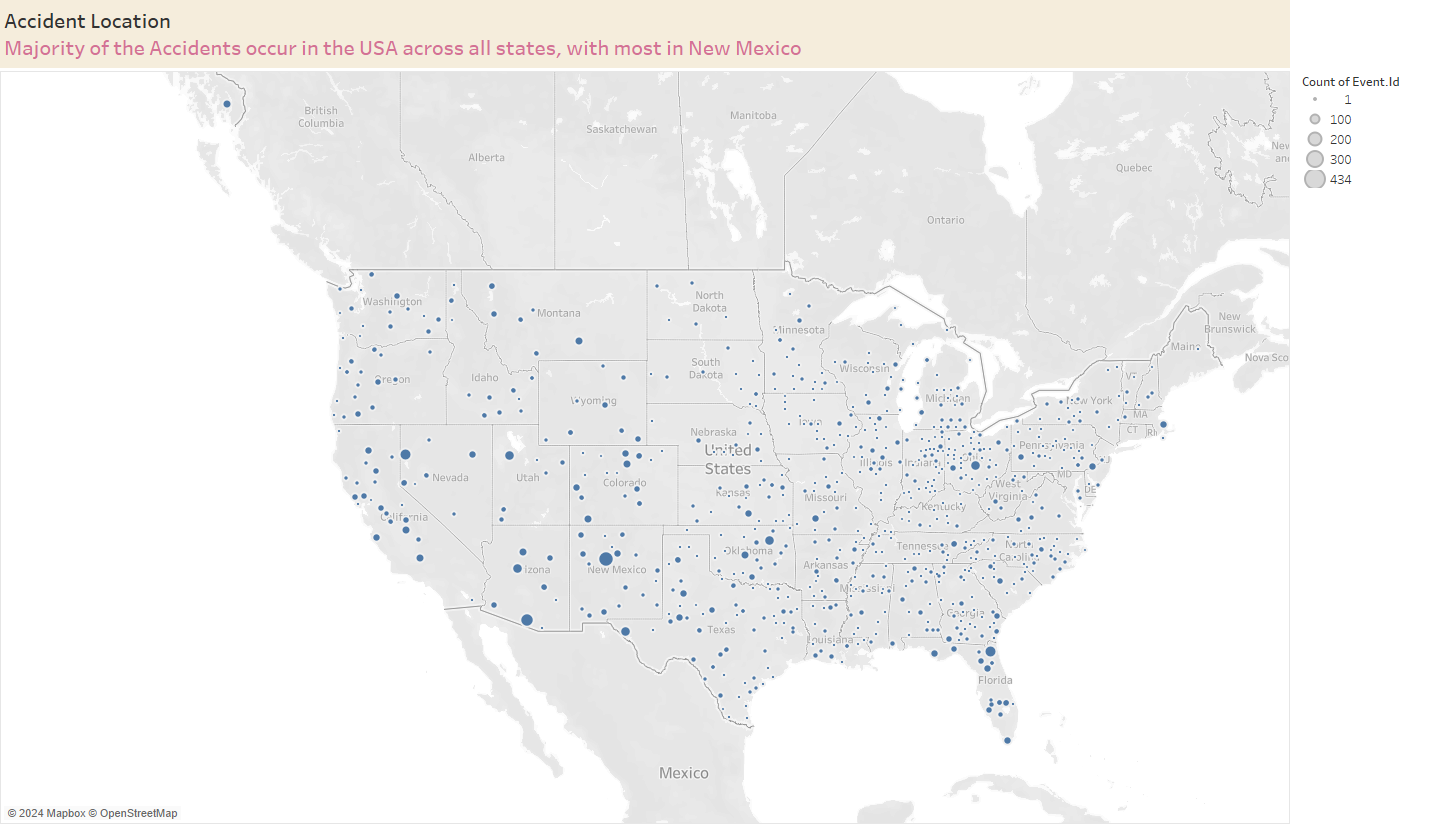

Cessna, Piper, Beech, Boeing and Bell registered the most accidents.

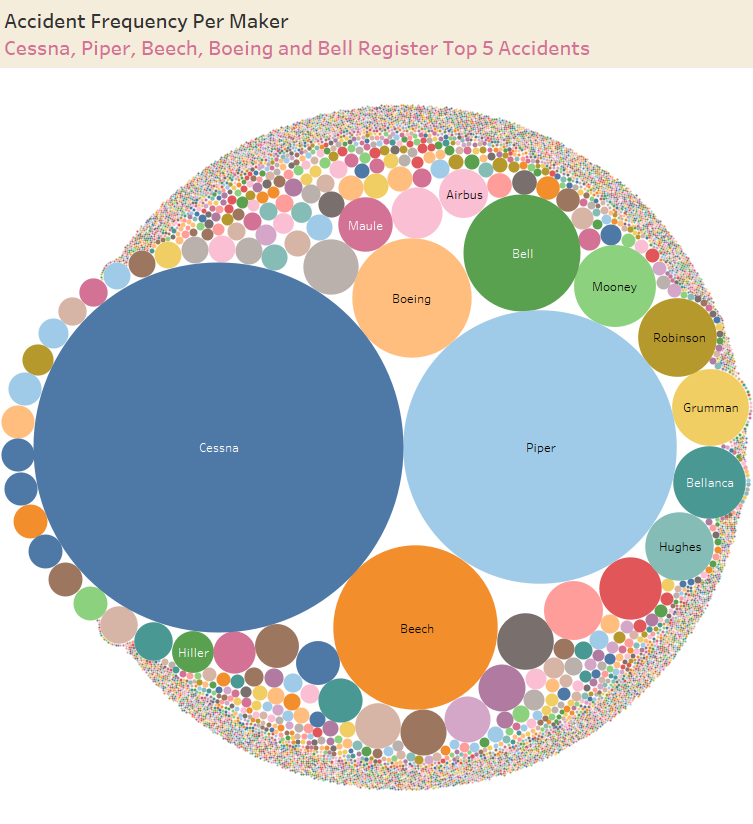

In the event of an accident, it is almost guaranteed that the aircraft damage will be substantial to totally damaged for most of the makers.

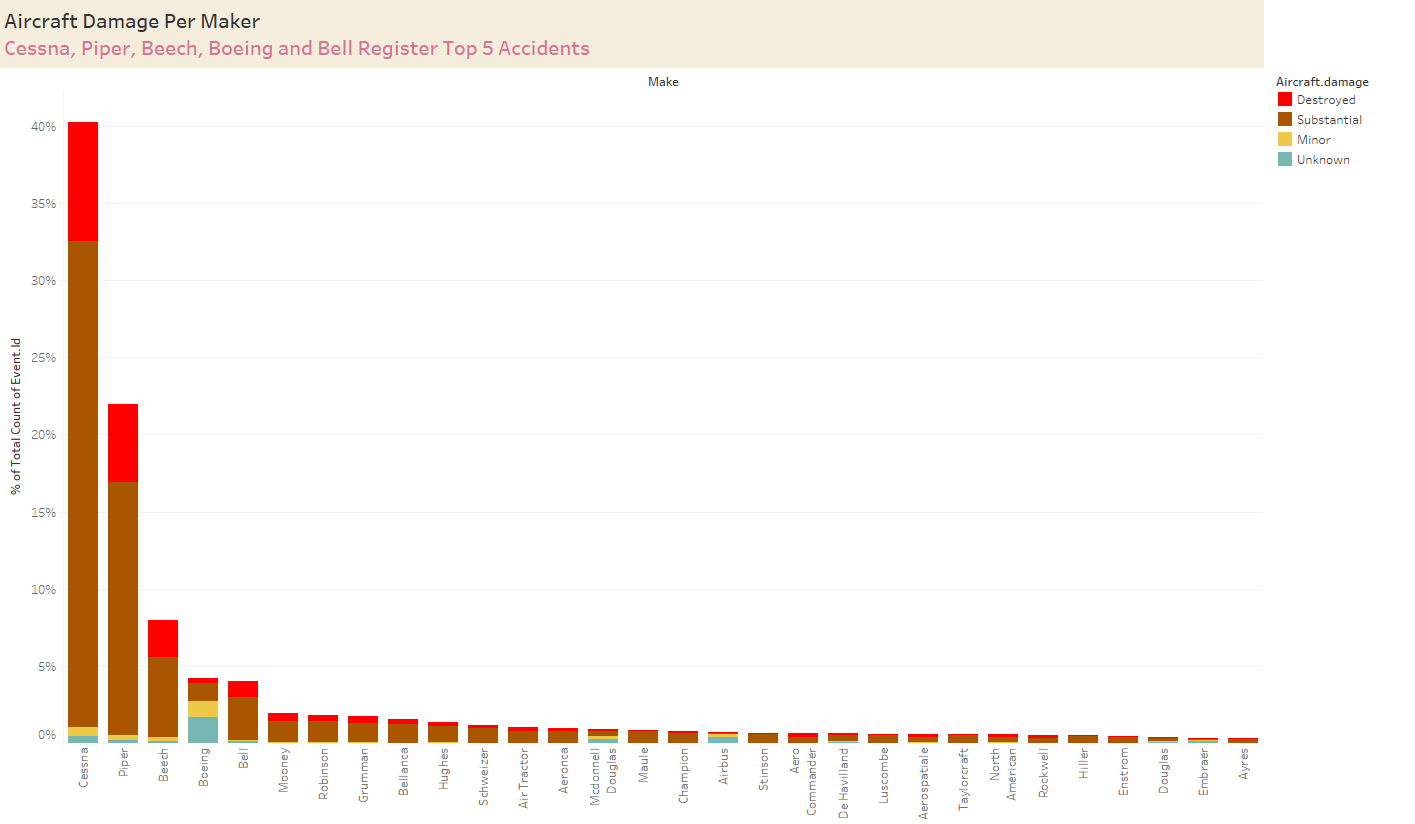

If you remove events where the aircraft damage is "Unknown", the following makers emerge as better candidates where there is a high likelihood of minor the accident only resulting in minor damage:

*   Airbus
*   Boeing
*   Mcdonnell Douglas
*   Embraer
*   Douglas

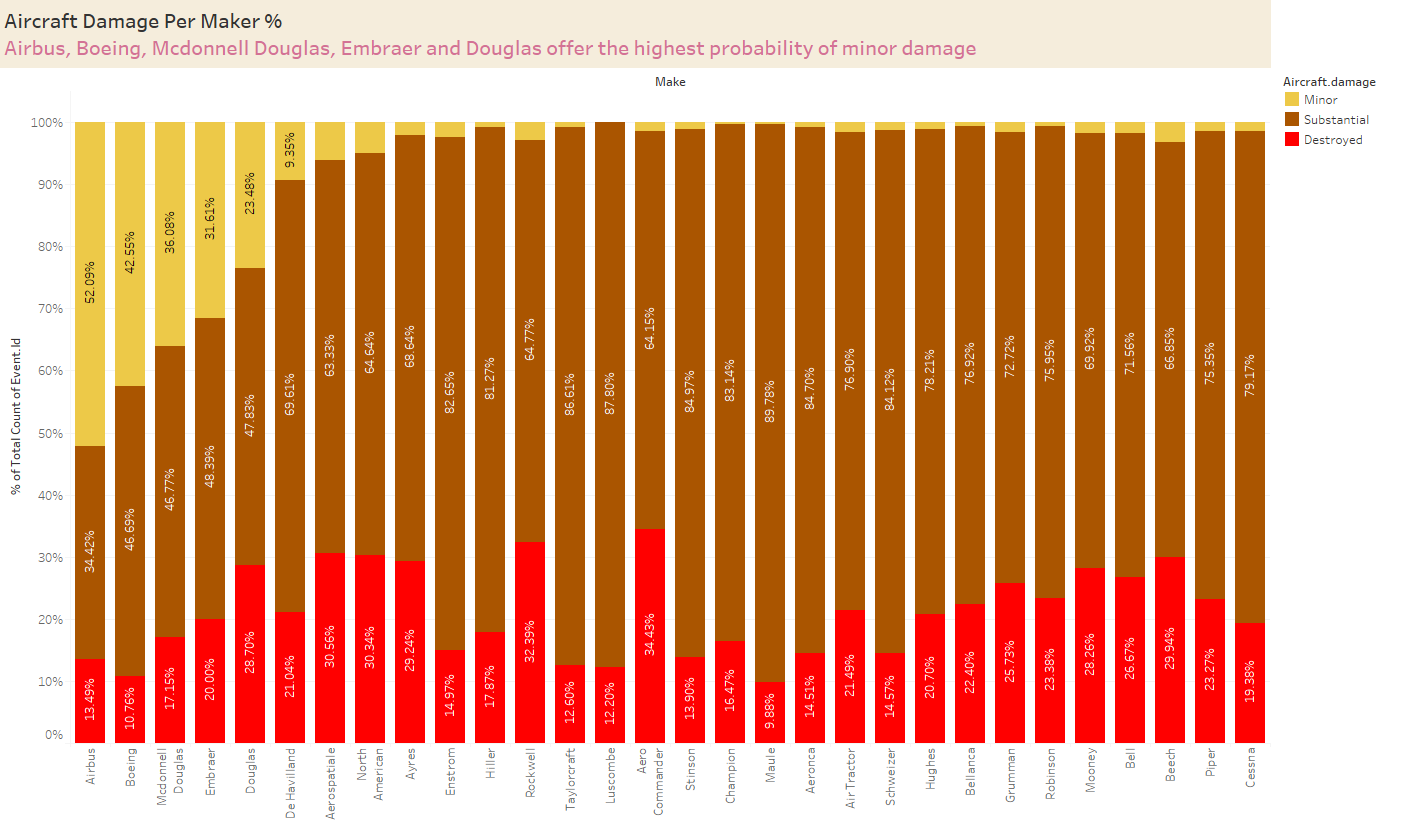

To analyze fatalities in the event of an accident, it is important to understand the total number of passengers involved in this data. This can be done by summing up all the fatalities, serious injuries, minor injuries and uninjured passengers.

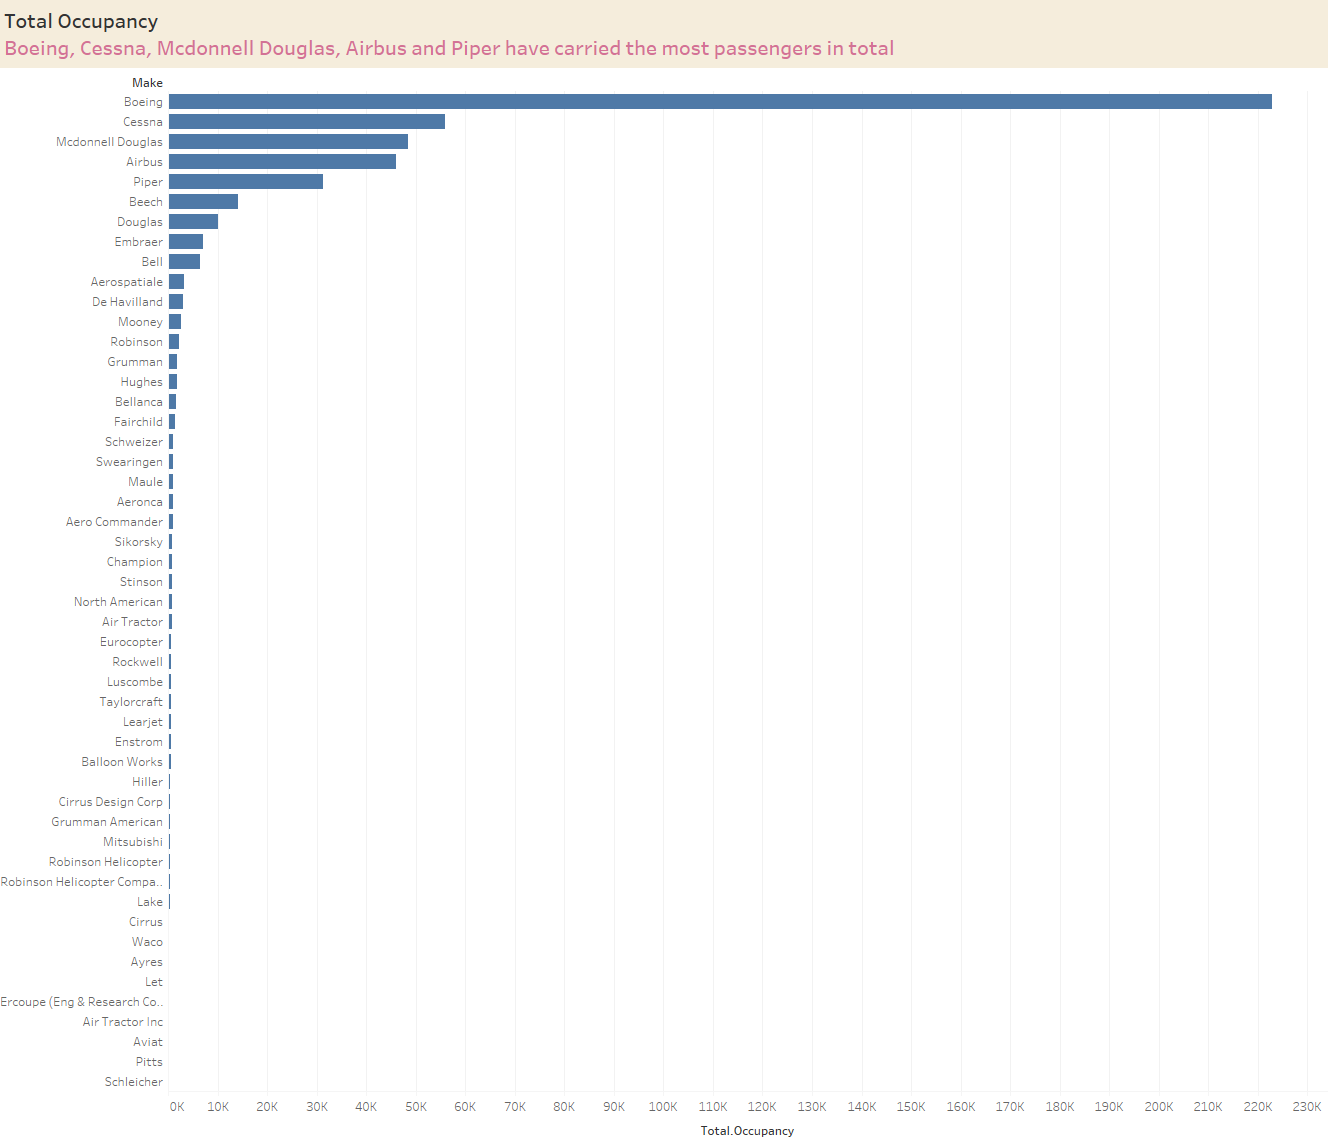

We go a step further to assess the average occupancy per flight from the data. This will tell us the relative sizes of the aircrafts

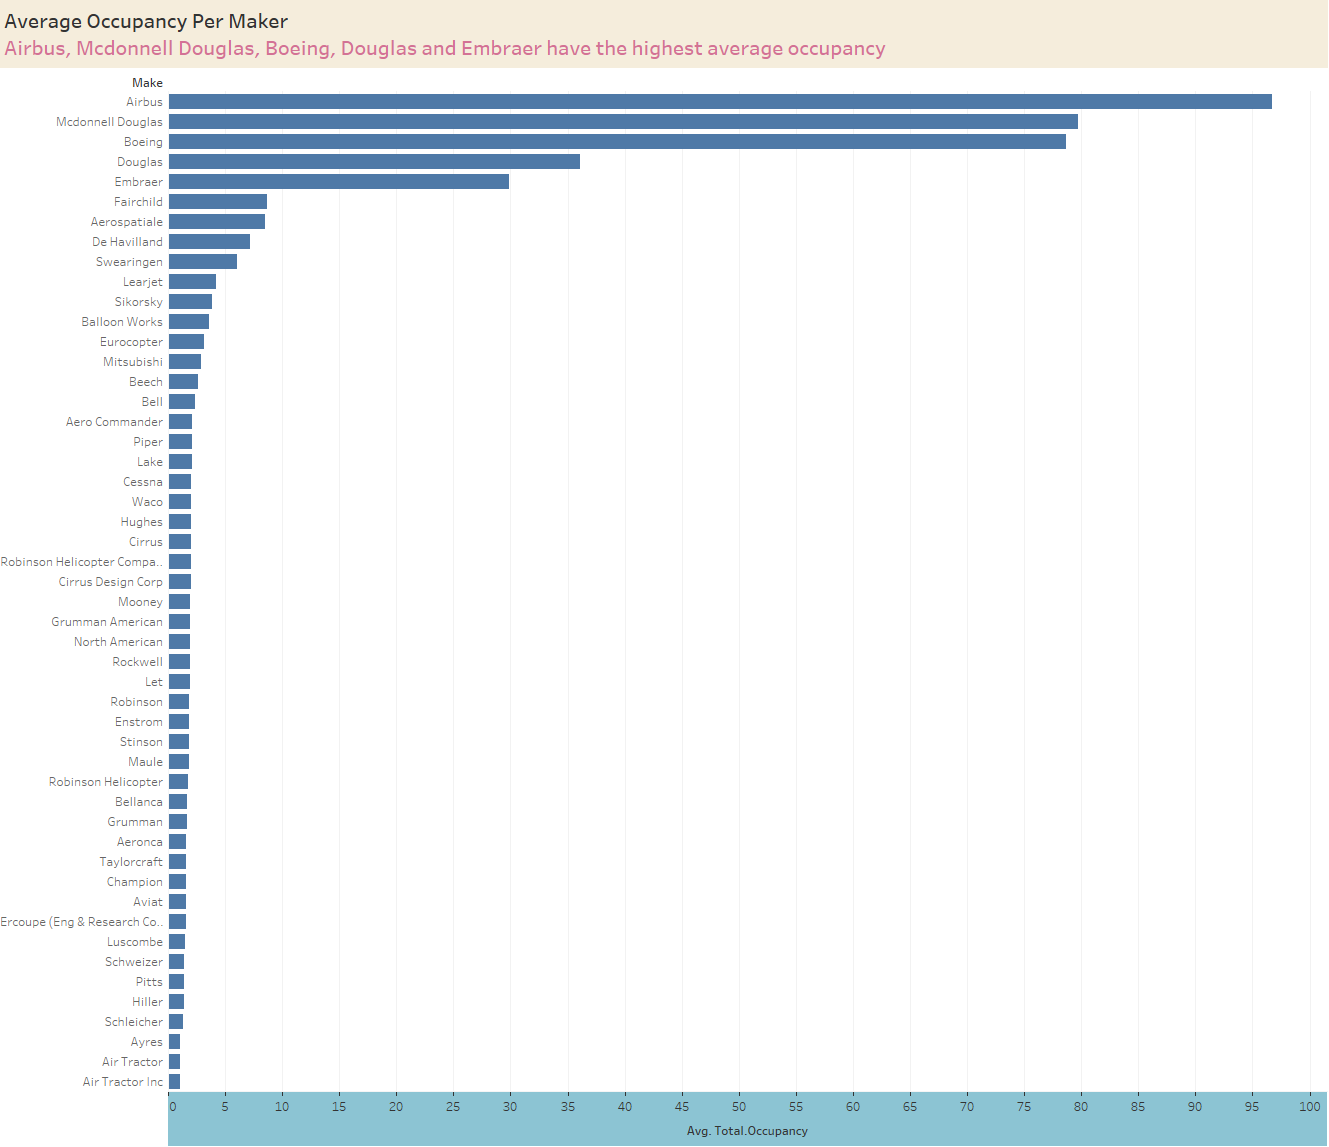

Airbus, Mcdonnel Douglas, Boeing, Douglas and Embraer are generally bigger planes carrying more people, hence their high number of average occupancy. Cessna has a very low average occupancy, i.e. they make small aircrafts carrying very few people (around 2).

It is important to consider the purpose of the flight from the accident data

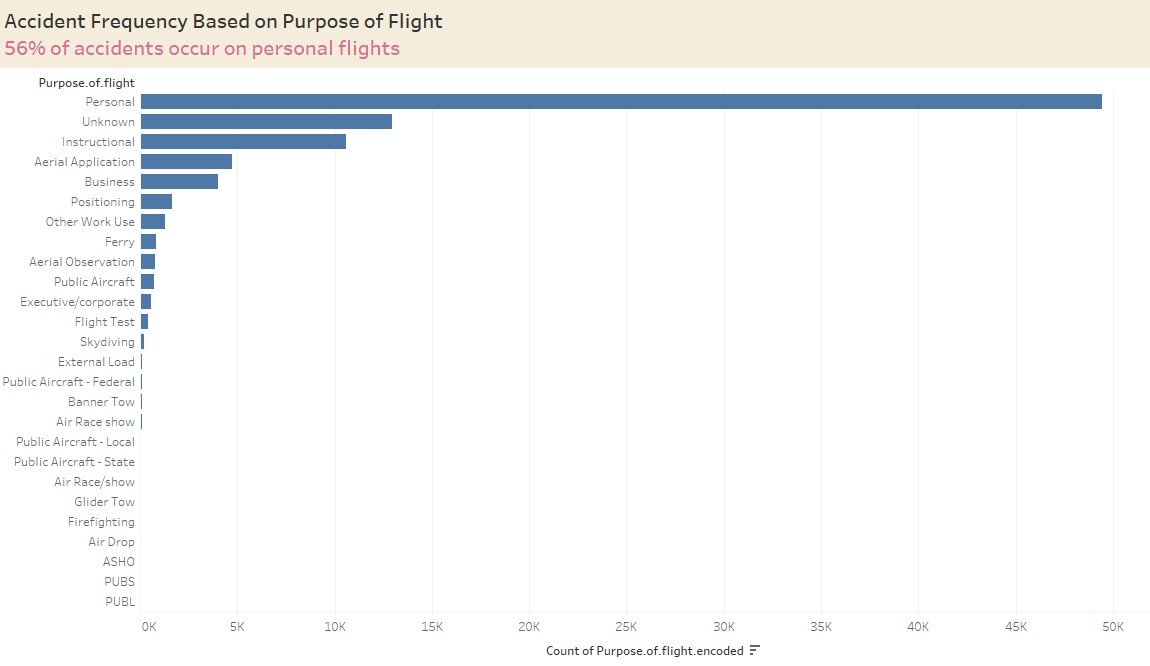

Most of the accidents occured during personal flights. Thus, this branch of aviation seems the most risky that our company should steer clear from, or only engage in with extreme caution.

Next, it is important to understand distribution of accidents across different aircraft categories over the years.

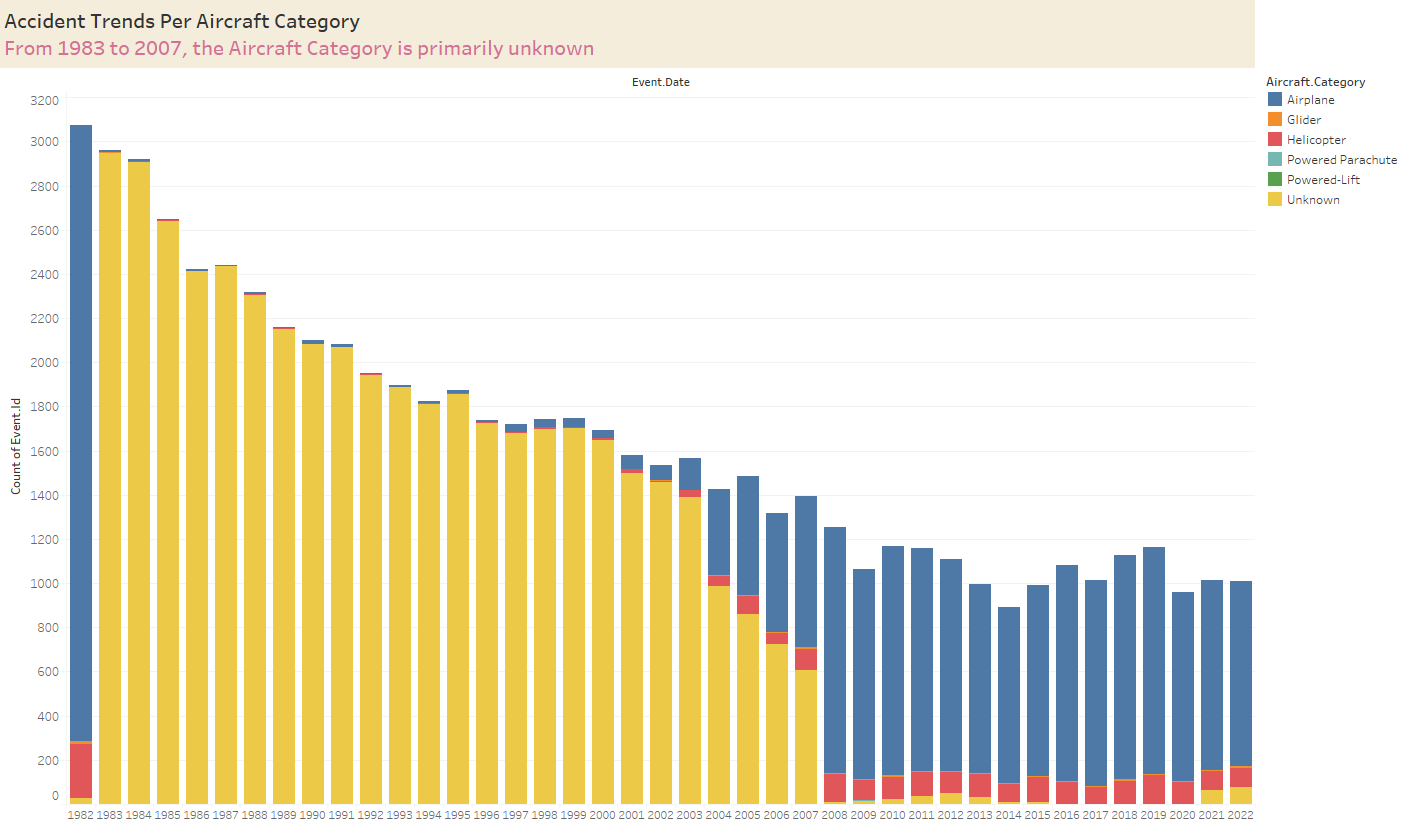

Majority of the aircraft category data is "unknown". Filtering out unknown data will give a better indication.

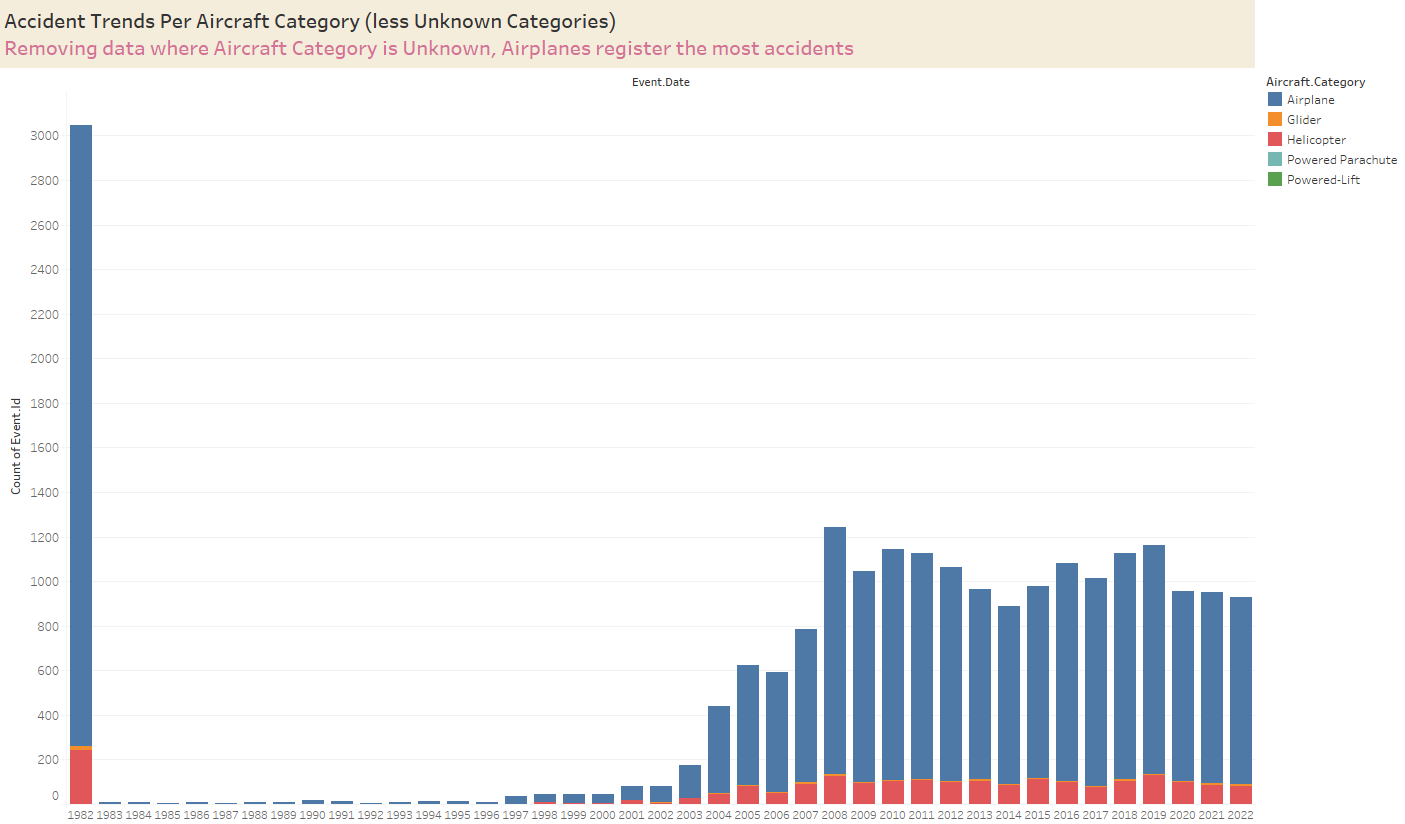

Airplanes register the most accidents, and it is possible that it is just because their the most used category.

**NB:- A recommendation for further study is to compare this against the total number of aircrafts of each category in operation. This will give a better sense of the probability of accident per aircraft category.**

Next, we analyze the aircraft damage per engine type.

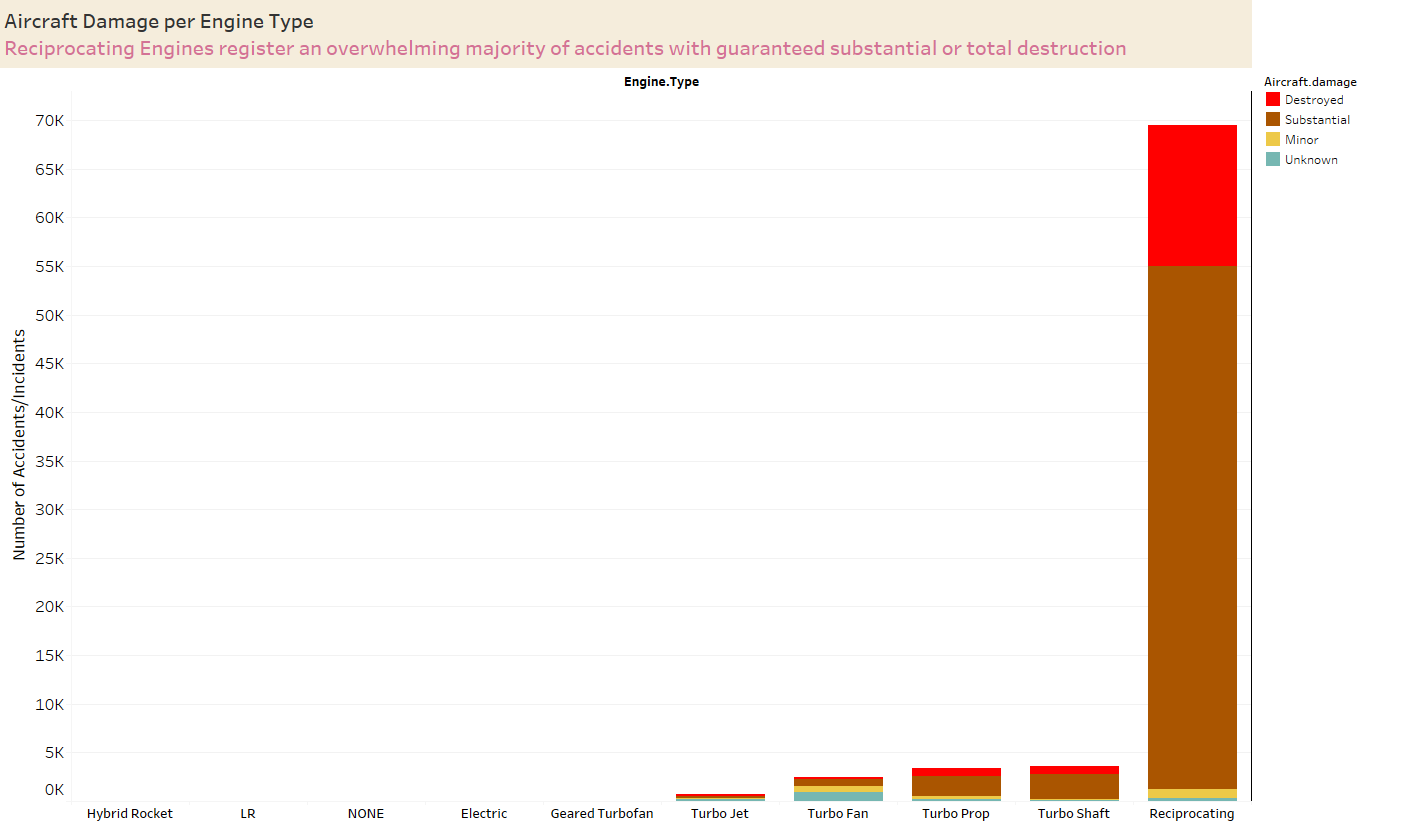

Reciprocating engines register an overwhelming majority of accidents with guaranteed substantial or total damage.

**NB:- It is likely that this is the cae due to their overwhelming majority for all faircrafts in operation. Analyzing this against the total population of reciprocating engine-type aircrafts in operation will give a better sense.**

It is important to understand the trend in accidents for different engine technologies over time

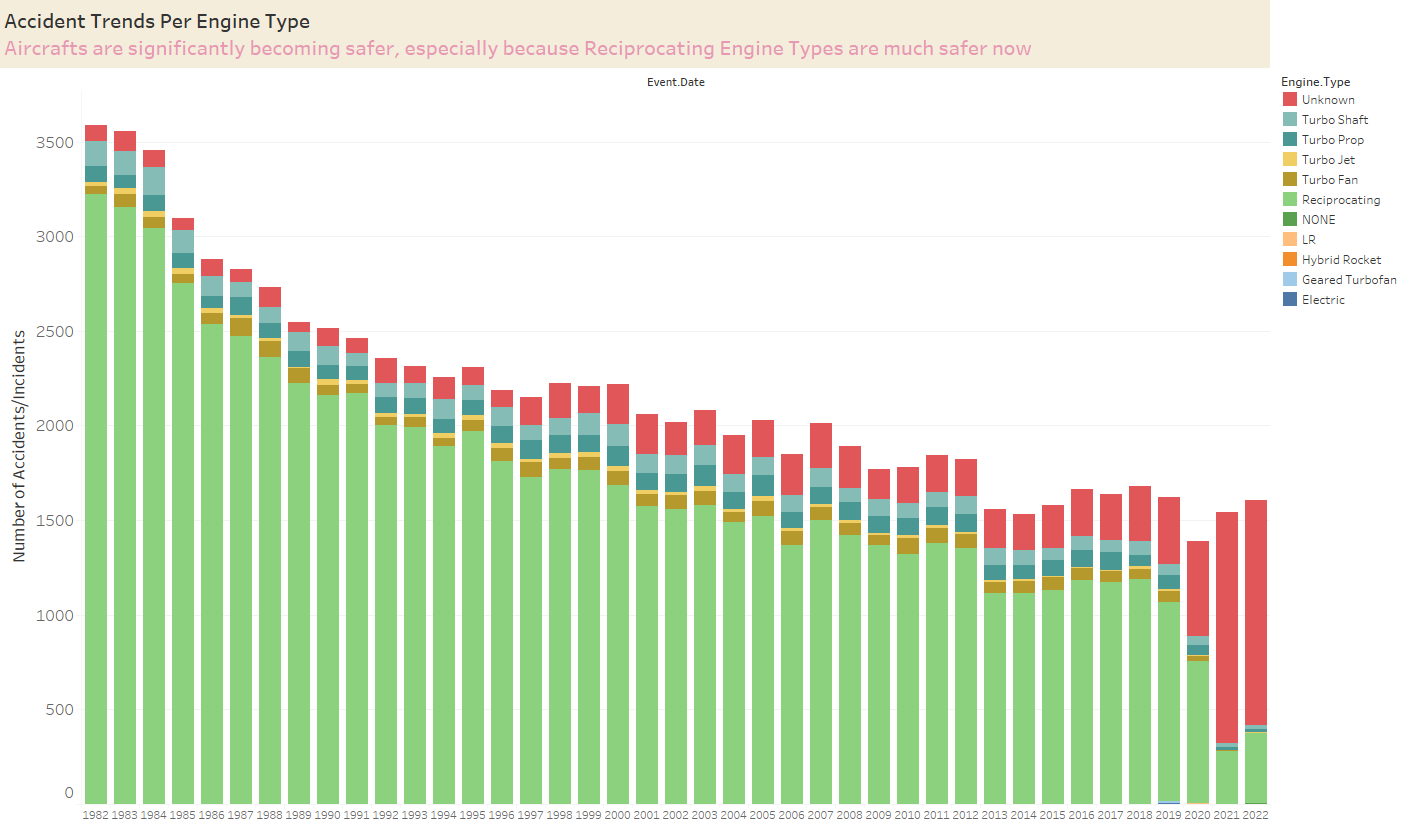

The total number of accidents is droping significantly, in parallel with a steep reduction in the number of accidents for reciprocating engine-type aircrafts. This indicates either of the following:


*   Reciprocating Engine-type Aircrafts are becoming significantly safer with time, hence low number of accident, or,
*   Reciprocating Engine-type Aircrafts are becoming less popular and hence not used as much

**NB:- Comparing this with data showing the engine types for all aircrafts in operation for the given years will give a better sense of this.**

